In [1]:
! pip install scikit-learn
import pandas as pd
import sys
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('./srcfiles/foodDeliveryTimes.csv')
#preview of the database
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


<Axes: >

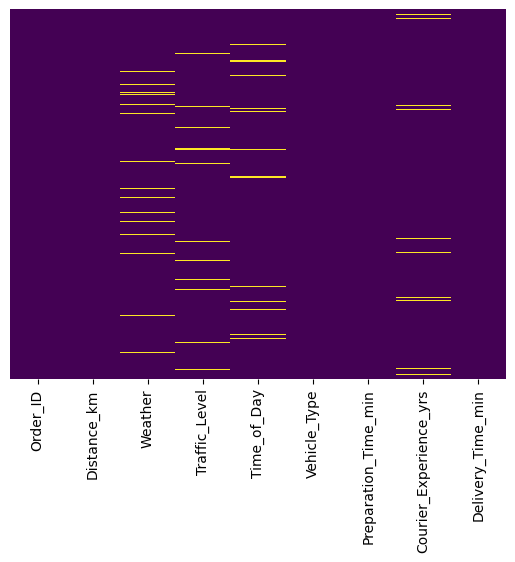

In [3]:
# print(df.shape)
# print(df.dropna().shape)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Above heat map shows the heatmap of features that have empty values
- The features that have missing values are Weather, Traffic_level, Time_Of_Day, Courier_Experience_yrs

In [4]:
# Shape of the db after dropping the rows with missing values
print(df.dropna().shape)

(883, 9)


- Thus, deleting all the rows with missing values would not be a good tactic because it would delete almost ~ 1/10th of the database
- Therefore for all the string (Non - Numeric) features we will fill the missing values as the modal value of that feature and for Courier_Experience_yrs we fill the missing values with the mean value.


In [5]:
mode_weather = df['Weather'].mode()[0]
mode_traffic_level = df['Traffic_Level'].mode()[0]
mode_time_of_day = df['Time_of_Day'].mode()[0]
mean_courier_experience = df['Courier_Experience_yrs'].mean()

print(f"Mode of Weather: {mode_weather}")
print(f"Mode of Traffic Level: {mode_traffic_level}")
print(f"Mode of Time Of Day: {mode_time_of_day}")
print(f"Mean of Courier Experience: {mean_courier_experience} || Rounded: {round(mean_courier_experience)}")

Mode of Weather: Clear
Mode of Traffic Level: Medium
Mode of Time Of Day: Morning
Mean of Courier Experience: 4.579381443298969 || Rounded: 5


In [6]:
#respectively filling the missing values
df['Weather'].fillna(mode_weather, inplace=True)
df['Traffic_Level'].fillna(mode_traffic_level, inplace=True)
df['Time_of_Day'].fillna(mode_time_of_day, inplace=True)
df['Courier_Experience_yrs'].fillna(round(mean_courier_experience), inplace=True)

df.isnull().sum()

C:\Users\choud\AppData\Local\Temp\ipykernel_3636\834208521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(mode_weather, inplace=True)
C:\Users\choud\AppData\Local\Temp\ipykernel_3636\834208521.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

- Below is the code to encode the categorical variables in the dataset

In [7]:


# Create label encoders for each categorical column
le_weather = LabelEncoder()
le_traffic = LabelEncoder()
le_time = LabelEncoder()
le_vehicle = LabelEncoder()

# Replace categorical columns with encoded values
df['Weather'] = le_weather.fit_transform(df['Weather'])
df['Traffic_Level'] = le_traffic.fit_transform(df['Traffic_Level']) 
df['Time_of_Day'] = le_time.fit_transform(df['Time_of_Day'])
df['Vehicle_Type'] = le_vehicle.fit_transform(df['Vehicle_Type'])

# Print mapping for reference
print("Weather mapping:", dict(zip(le_weather.classes_, le_weather.transform(le_weather.classes_))))
print("Traffic Level mapping:", dict(zip(le_traffic.classes_, le_traffic.transform(le_traffic.classes_))))
print("Time of Day mapping:", dict(zip(le_time.classes_, le_time.transform(le_time.classes_))))
print("Vehicle Type mapping:", dict(zip(le_vehicle.classes_, le_vehicle.transform(le_vehicle.classes_))))

# write the encoded data to a new csv file
df.to_csv('./srcfiles/foodDeliveryTimes_encoded.csv', index=False)

Weather mapping: {'Clear': np.int64(0), 'Foggy': np.int64(1), 'Rainy': np.int64(2), 'Snowy': np.int64(3), 'Windy': np.int64(4)}
Traffic Level mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
Time of Day mapping: {'Afternoon': np.int64(0), 'Evening': np.int64(1), 'Morning': np.int64(2), 'Night': np.int64(3)}
Vehicle Type mapping: {'Bike': np.int64(0), 'Car': np.int64(1), 'Scooter': np.int64(2)}


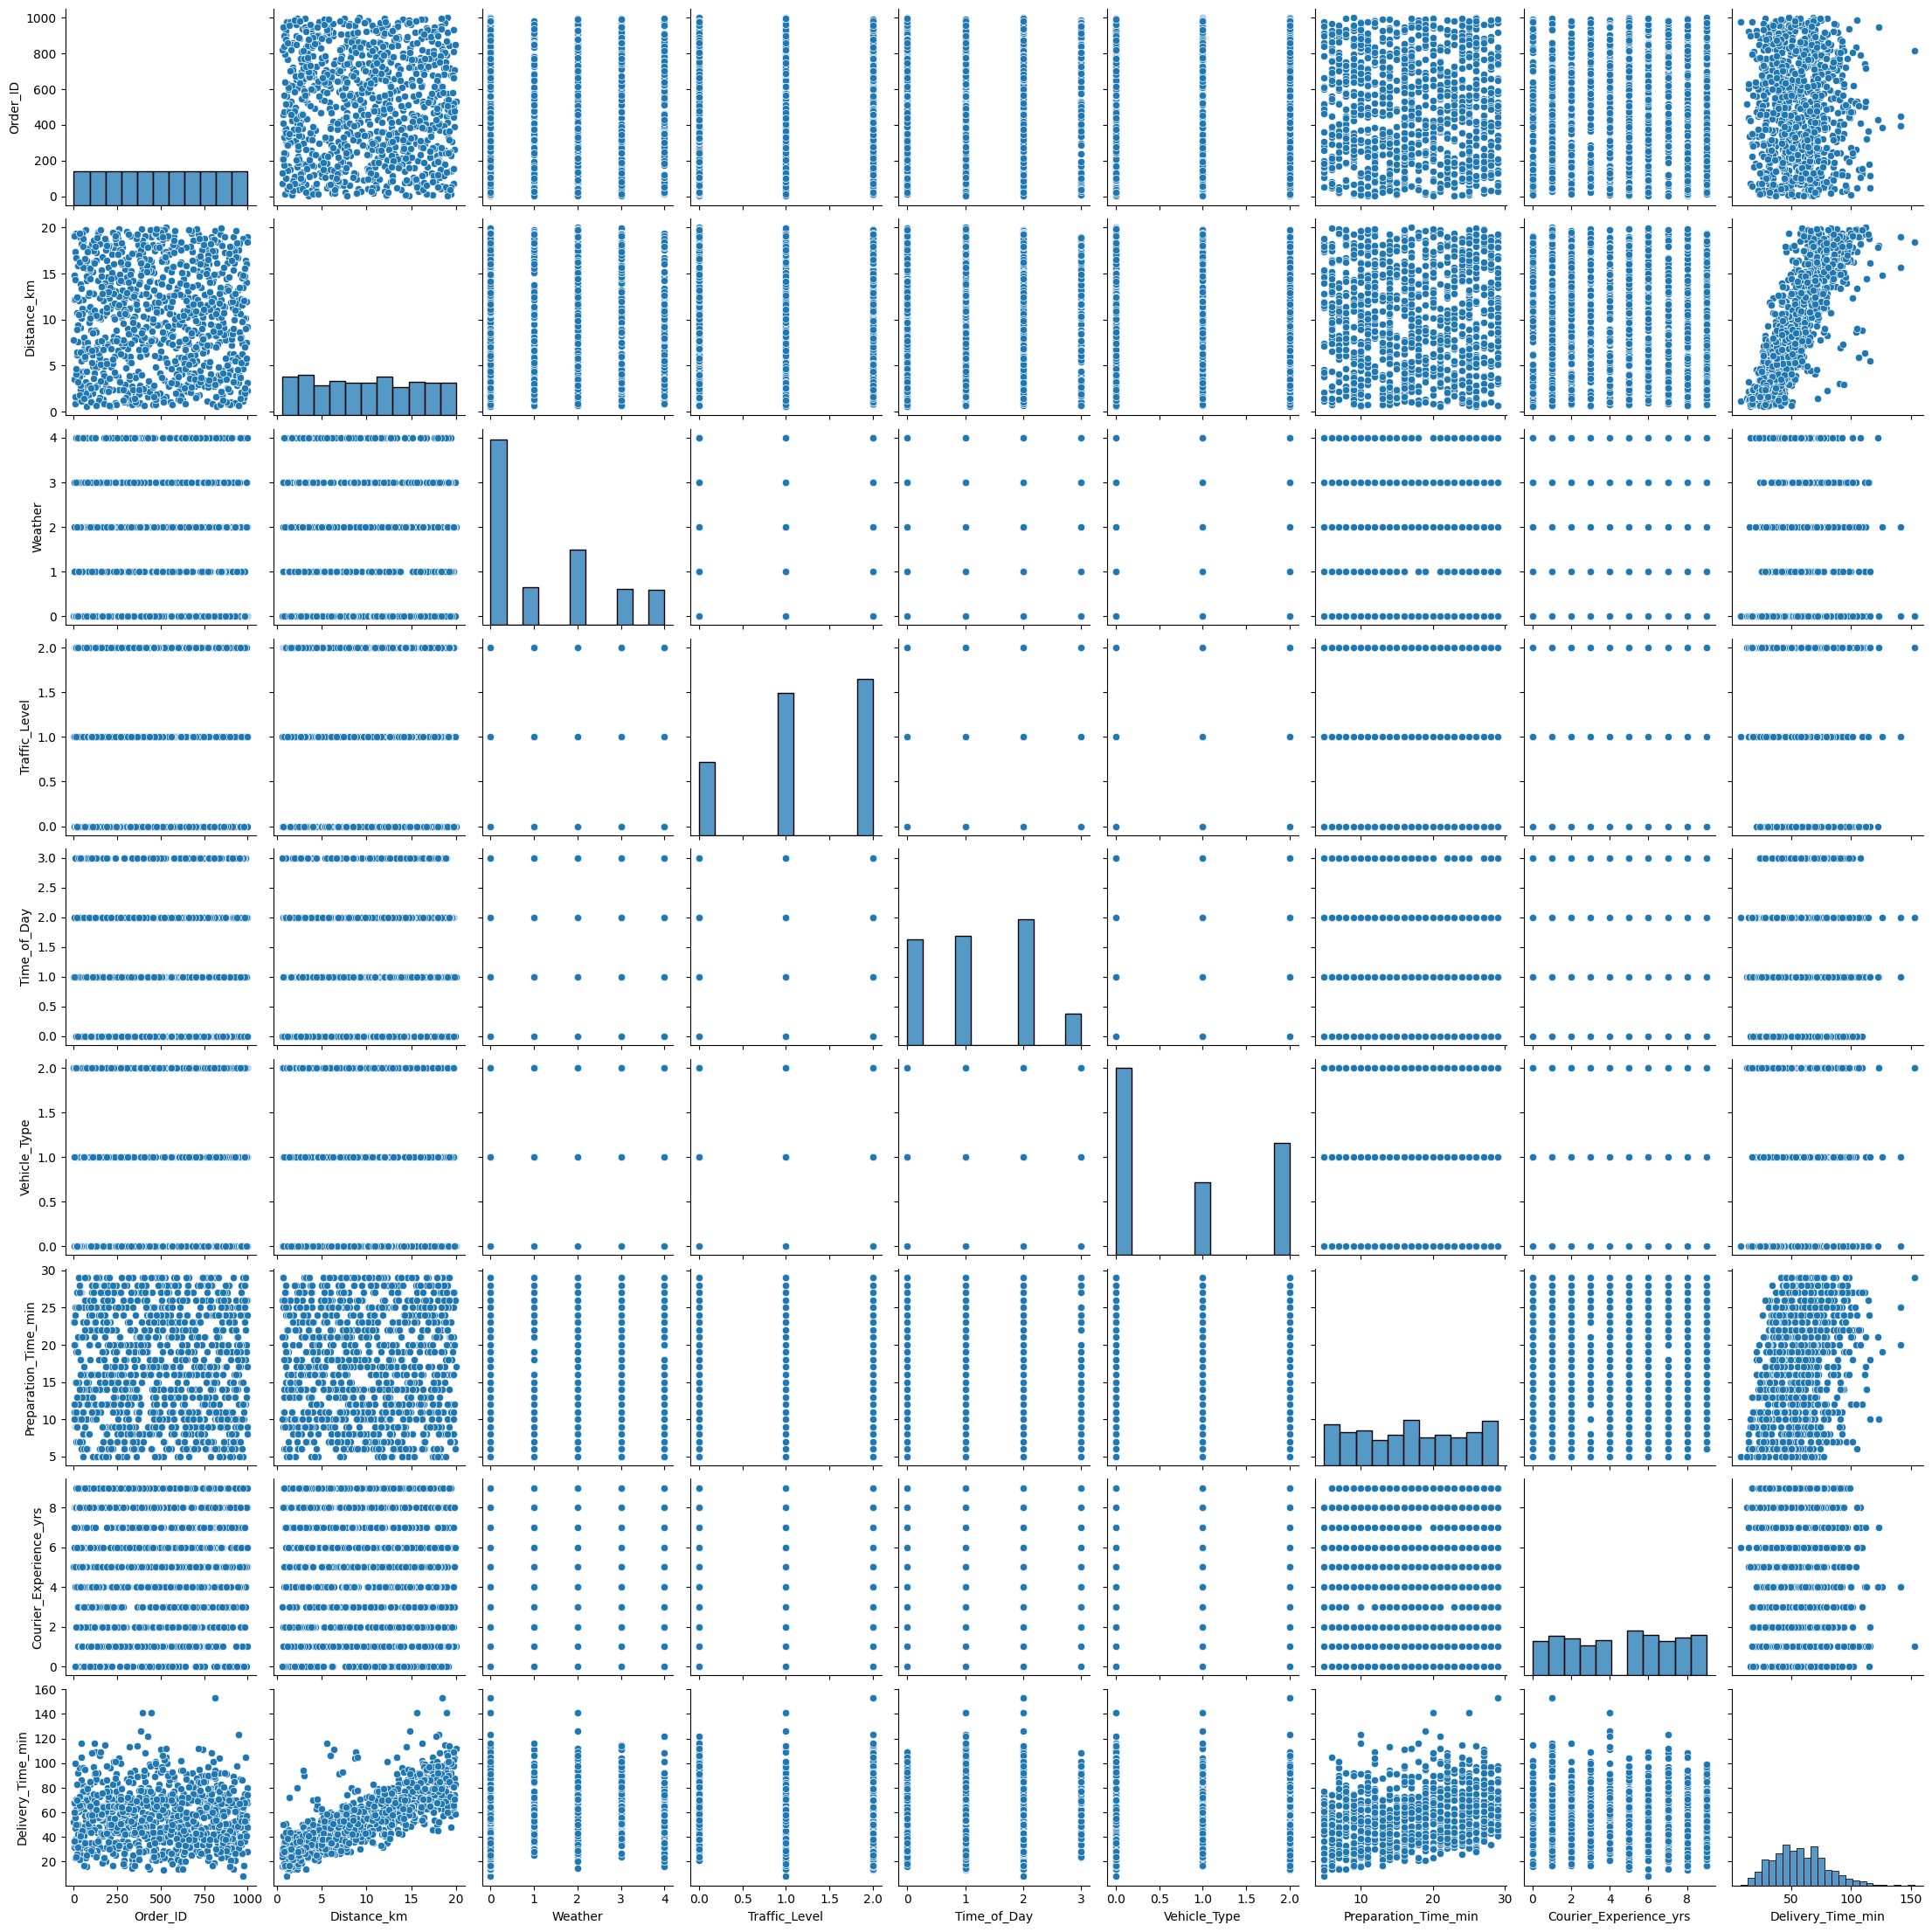

In [8]:
sns.pairplot(df)

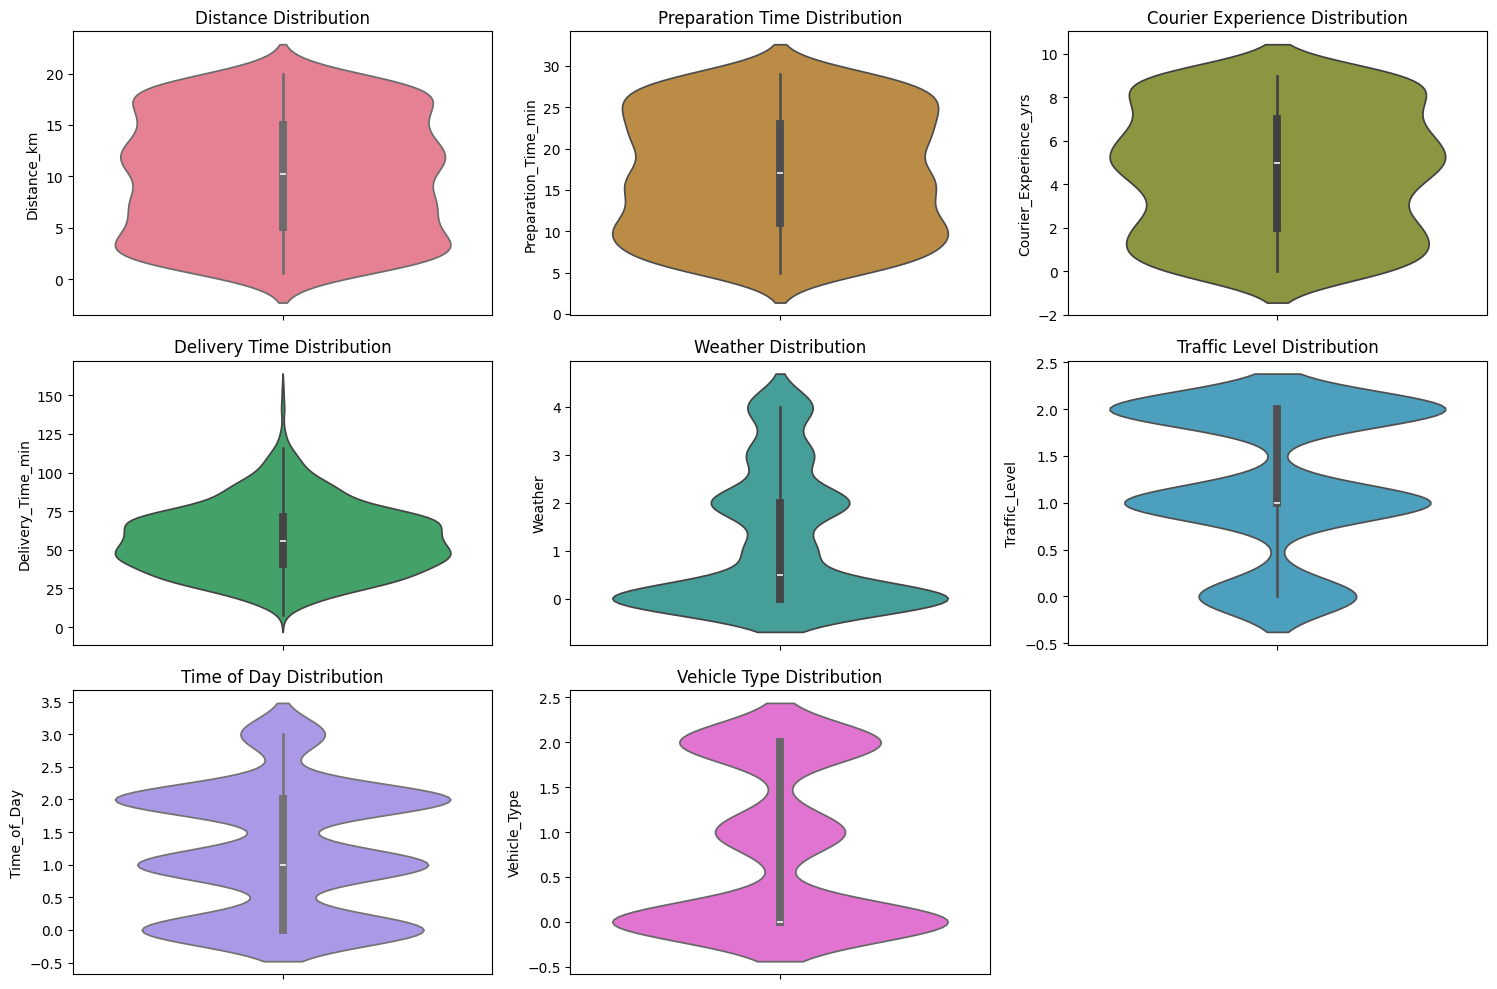

In [9]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Define custom color palette
colors = sns.color_palette("husl", 8)

# Create violin plots for numerical features
plt.subplot(3,3,1)
sns.violinplot(y=df['Distance_km'], color=colors[0], inner='box', width=0.8)
plt.title('Distance Distribution')

plt.subplot(3,3,2)
sns.violinplot(y=df['Preparation_Time_min'], color=colors[1], inner='box', width=0.8)
plt.title('Preparation Time Distribution')

plt.subplot(3,3,3)
sns.violinplot(y=df['Courier_Experience_yrs'], color=colors[2], inner='box', width=0.8)
plt.title('Courier Experience Distribution')

plt.subplot(3,3,4)
sns.violinplot(y=df['Delivery_Time_min'], color=colors[3], inner='box', width=0.8)
plt.title('Delivery Time Distribution')

# Create violin plots for encoded categorical features
plt.subplot(3,3,5)
sns.violinplot(y=df['Weather'], color=colors[4], inner='box', width=0.8)
plt.title('Weather Distribution')

plt.subplot(3,3,6)
sns.violinplot(y=df['Traffic_Level'], color=colors[5], inner='box', width=0.8)
plt.title('Traffic Level Distribution')

plt.subplot(3,3,7)
sns.violinplot(y=df['Time_of_Day'], color=colors[6], inner='box', width=0.8)
plt.title('Time of Day Distribution')

plt.subplot(3,3,8)
sns.violinplot(y=df['Vehicle_Type'], color=colors[7], inner='box', width=0.8)
plt.title('Vehicle Type Distribution')

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("./srcfiles/foodDeliveryTimes_encoded.csv")

# First, split into 70% train and 30% temp (which will be further split into val/test)
train_data, temp_data = train_test_split(df, test_size=0.30, random_state=42)

# Split temp_data into 50% validation and 50% test (which results in 15% each of total data)
val_data, test_data = train_test_split(temp_data, test_size=0.50, random_state=42)

# Save the splits
train_data.to_csv("./srcfiles/train.csv", index=False)
val_data.to_csv("./srcfiles/validation.csv", index=False)
test_data.to_csv("./srcfiles/test.csv", index=False)

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")


Train size: 700, Validation size: 150, Test size: 150


In [11]:
import pandas as pd

# Load the split datasets
train_data = pd.read_csv("./srcfiles/train.csv")
val_data = pd.read_csv("./srcfiles/validation.csv")
test_data = pd.read_csv("./srcfiles/test.csv")

# Compute mean & standard deviation from train_data ONLY (to avoid data leakage)
train_mean = train_data.mean()
train_std = train_data.std()

# Function to standardize data using train statistics
def standardize(df, mean, std):
    return (df - mean) / std

# Standardize datasets using train's mean & std
train_data_std = standardize(train_data, train_mean, train_std)
val_data_std = standardize(val_data, train_mean, train_std)
test_data_std = standardize(test_data, train_mean, train_std)

# Save standardized datasets
train_data_std.to_csv("./srcfiles/train_standardized.csv", index=False)
val_data_std.to_csv("./srcfiles/validation_standardized.csv", index=False)
test_data_std.to_csv("./srcfiles/test_standardized.csv", index=False)

print("Standardization complete. Standardized files saved!")


Standardization complete. Standardized files saved!


In [12]:
train_data_std.head()
train_data_std.describe()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
mean,7.612958e-18,-1.243450e-16,-7.612958e-17,6.153808e-17,5.075305e-18,6.978545e-18,-1.230762e-16,-2.791418e-17,1.344956e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.755978e+00,-1.683757e+00,-8.825282e-01,-1.655263e+00,-1.263934e+00,-9.050501e-01,-1.703159e+00,-1.593522e+00,-2.249939e+00
25%,-8.583109e-01,-8.665062e-01,-8.825282e-01,-3.095207e-01,-1.263934e+00,-9.050501e-01,-8.639674e-01,-9.047505e-01,-6.983918e-01
50%,4.663656e-03,2.372183e-02,-1.625168e-01,-3.095207e-01,-2.363455e-01,-9.050501e-01,-2.477612e-02,1.284067e-01,-5.951944e-02
75%,8.606997e-01,8.400939e-01,5.574945e-01,1.036221e+00,7.912435e-01,1.407122e+00,8.144152e-01,8.171782e-01,6.249867e-01
max,1.709797e+00,1.727684e+00,1.997517e+00,1.036221e+00,1.818832e+00,1.407122e+00,1.653606e+00,1.505950e+00,4.366954e+00


Epoch 0: Train Loss = 0.49779, Val Loss = 0.56425
Epoch 10: Train Loss = 0.27415, Val Loss = 0.30474
Epoch 20: Train Loss = 0.19351, Val Loss = 0.20748
Epoch 30: Train Loss = 0.16425, Val Loss = 0.17020
Epoch 40: Train Loss = 0.15357, Val Loss = 0.15548
Epoch 50: Train Loss = 0.14965, Val Loss = 0.14942
Epoch 60: Train Loss = 0.14820, Val Loss = 0.14681
Epoch 70: Train Loss = 0.14767, Val Loss = 0.14561
Epoch 80: Train Loss = 0.14747, Val Loss = 0.14503


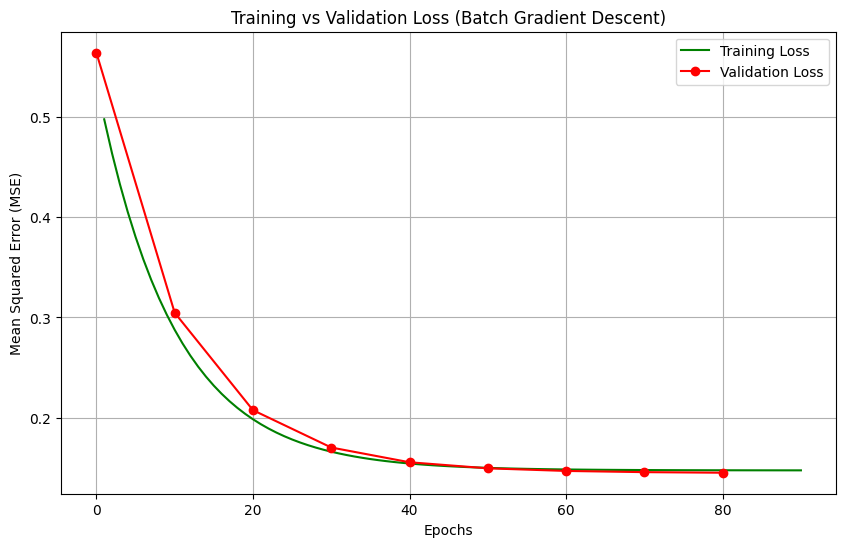

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Batch Gradient Descent Function
def batch_gradient_descent(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=1000):
    m, n = X_train.shape  # Number of samples (m) and features (n)
    
    W = np.random.normal(0, 0.01, n)
    b = np.random.normal(0, 0.01)
    
    train_loss_history = []
    val_loss_history = []
    val_epochs = []

    for epoch in range(epochs):
        # Compute predictions for training
        y_pred = np.dot(X_train, W) + b
        
        # Compute error
        error = y_pred - y_train
        
        # Compute gradients
        dW = (1 / m) * np.dot(X_train.T, error)
        db = (1 / m) * np.sum(error)
        
        # Update parameters
        W -= learning_rate * dW
        b -= learning_rate * db
        
        # Compute training MSE
        train_mse = (1 / (2 * m)) * np.sum(error ** 2)
        train_loss_history.append(train_mse)
        
        # Compute validation MSE every 10 epochs
        if epoch % 10 == 0:
            val_pred = np.dot(X_val, W) + b
            val_error = val_pred - y_val
            val_mse = (1 / (2 * len(y_val))) * np.sum(val_error ** 2)
            val_loss_history.append(val_mse)
            val_epochs.append(epoch)
            print(f"Epoch {epoch}: Train Loss = {train_mse:.5f}, Val Loss = {val_mse:.5f}")
    
    return W, b, train_loss_history, val_loss_history, val_epochs

# Load standardized train and validation data
train_data = pd.read_csv("./srcfiles/train_standardized.csv")
val_data = pd.read_csv("./srcfiles/validation_standardized.csv")

# Split features and target
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_val = val_data.iloc[:, :-1].values
y_val = val_data.iloc[:, -1].values

# Train the model
W_opt, b_opt, train_loss_history, val_loss_history, val_epochs = batch_gradient_descent(
    X_train, y_train, X_val, y_val, learning_rate=0.05, epochs=90
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label="Training Loss", color="g")
plt.plot(val_epochs, val_loss_history, label="Validation Loss", color="r", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Validation Loss (Batch Gradient Descent)")
plt.legend()
plt.grid()
plt.show()


Iteration 0: Train Loss = 0.47156, Val Loss = 0.57283
Iteration 10: Train Loss = 0.25547, Val Loss = 0.29916
Iteration 20: Train Loss = 0.18928, Val Loss = 0.20778
Iteration 30: Train Loss = 0.16566, Val Loss = 0.17251
Iteration 40: Train Loss = 0.15382, Val Loss = 0.15697
Iteration 50: Train Loss = 0.14951, Val Loss = 0.15094
Iteration 60: Train Loss = 0.14839, Val Loss = 0.14692
Iteration 70: Train Loss = 0.14814, Val Loss = 0.14700
Iteration 80: Train Loss = 0.14792, Val Loss = 0.14624
Iteration 90: Train Loss = 0.14751, Val Loss = 0.14455
Iteration 100: Train Loss = 0.14761, Val Loss = 0.14370
Iteration 110: Train Loss = 0.14746, Val Loss = 0.14449
Iteration 120: Train Loss = 0.14764, Val Loss = 0.14470
Iteration 130: Train Loss = 0.14744, Val Loss = 0.14520
Iteration 140: Train Loss = 0.14743, Val Loss = 0.14419
Iteration 150: Train Loss = 0.14746, Val Loss = 0.14398
Iteration 160: Train Loss = 0.14779, Val Loss = 0.14676
Iteration 170: Train Loss = 0.14775, Val Loss = 0.14417
Ite

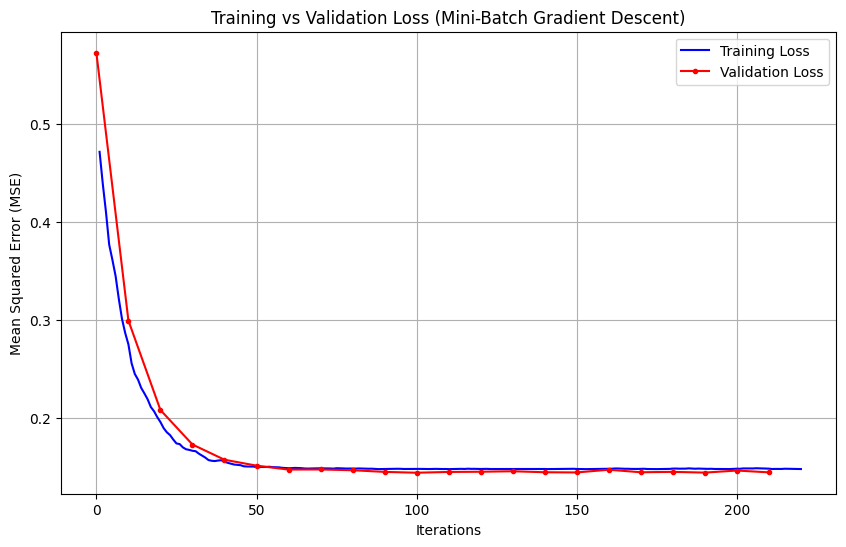

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mini-Batch Gradient Descent Function
def mini_batch_gradient_descent(X, y, X_val, y_val, learning_rate=0.01, epochs=1000, batch_size=32):
    m, n = X.shape  # Number of samples (m) and features (n)
    
    # Initialize weights and bias
    W = np.zeros(n)
    b = 0
    
    train_loss_history = []
    val_loss_history = []
    iteration_count = []
    total_iterations = 0  # Track total number of iterations

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):  # Mini-batch processing
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute predictions
            y_pred = np.dot(X_batch, W) + b

            # Compute error
            error = y_pred - y_batch

            # Compute gradients
            dW = (1 / batch_size) * np.dot(X_batch.T, error)
            db = (1 / batch_size) * np.sum(error)

            # Update parameters
            W -= learning_rate * dW
            b -= learning_rate * db

            # Compute training MSE
            total_error = np.dot(X, W) + b - y
            train_mse = (1 / (2 * m)) * np.sum(total_error ** 2)
            train_loss_history.append(train_mse)
            

            
            # Compute validation MSE every 10 iterations
            if total_iterations % 10 == 0:
                val_pred = np.dot(X_val, W) + b
                val_error = val_pred - y_val
                val_mse = (1 / (2 * len(y_val))) * np.sum(val_error ** 2)
                val_loss_history.append(val_mse)
                iteration_count.append(total_iterations)
                print(f"Iteration {total_iterations}: Train Loss = {train_mse:.5f}, Val Loss = {val_mse:.5f}")
            total_iterations += 1

    return W, b, train_loss_history, val_loss_history, iteration_count

# Train the model
W_opt, b_opt, train_loss_history, val_loss_history, iteration_count = mini_batch_gradient_descent(
    X_train, y_train, X_val, y_val, learning_rate=0.05, epochs=10, batch_size=32
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label="Training Loss", color="b")
plt.plot(iteration_count, val_loss_history, label="Validation Loss", color="r", marker='.')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Validation Loss (Mini-Batch Gradient Descent)")
plt.legend()
plt.grid()
plt.show()


Iteration 0: Train Loss = 0.48905, Val Loss = 0.60052
Iteration 100: Train Loss = 0.18216, Val Loss = 0.19106
Iteration 200: Train Loss = 0.14939, Val Loss = 0.14965
Iteration 300: Train Loss = 0.15574, Val Loss = 0.15810
Iteration 400: Train Loss = 0.15485, Val Loss = 0.15914
Iteration 500: Train Loss = 0.14814, Val Loss = 0.14421
Iteration 600: Train Loss = 0.15270, Val Loss = 0.15246
Iteration 700: Train Loss = 0.15296, Val Loss = 0.14362
Iteration 800: Train Loss = 0.15242, Val Loss = 0.14548
Iteration 900: Train Loss = 0.15454, Val Loss = 0.15159
Iteration 1000: Train Loss = 0.14945, Val Loss = 0.14829
Iteration 1100: Train Loss = 0.15190, Val Loss = 0.14716
Iteration 1200: Train Loss = 0.15093, Val Loss = 0.15192
Iteration 1300: Train Loss = 0.14902, Val Loss = 0.15000
Iteration 1400: Train Loss = 0.15104, Val Loss = 0.14437
Iteration 1500: Train Loss = 0.15194, Val Loss = 0.15034
Iteration 1600: Train Loss = 0.15130, Val Loss = 0.15351
Iteration 1700: Train Loss = 0.15345, Val L

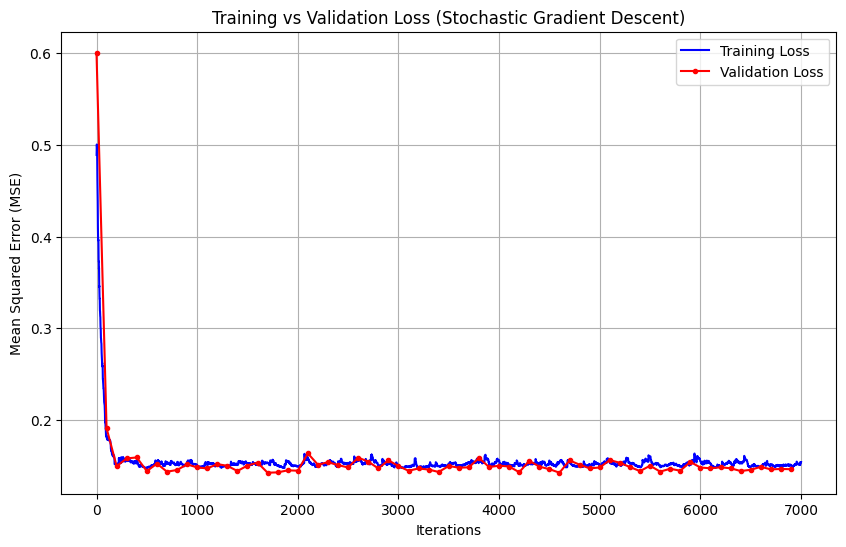

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, X_val, y_val, learning_rate=0.01, epochs=1000):
    m, n = X.shape  
    
    W = np.zeros(n)
    b = 0
    
    train_loss_history = []
    val_loss_history = []
    iteration_count = []
    total_iterations = 0

    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):  # Loop through each sample
            # Select a single sample
            X_i = X_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]
            
            # Compute prediction
            y_pred = np.dot(X_i, W) + b
            
            # Compute error
            error = y_pred - y_i
            
            # Compute gradients
            dW = X_i.T * error
            db = error
            
            # Update parameters
            W -= learning_rate * dW.flatten()
            b -= learning_rate * db
            
            # Compute training MSE
            total_error = np.dot(X, W) + b - y
            train_mse = (1 / (2 * m)) * np.sum(total_error ** 2)
            train_loss_history.append(train_mse)
            
            # Compute validation MSE every 10 iterations
            if total_iterations % 100 == 0:
                val_pred = np.dot(X_val, W) + b
                val_error = val_pred - y_val
                val_mse = (1 / (2 * len(y_val))) * np.sum(val_error ** 2)
                val_loss_history.append(val_mse)
                iteration_count.append(total_iterations)
                print(f"Iteration {total_iterations}: Train Loss = {train_mse:.5f}, Val Loss = {val_mse:.5f}")
            
            total_iterations += 1

    return W, b, train_loss_history, val_loss_history, iteration_count

# Train the model
W_opt, b_opt, train_loss_history, val_loss_history, iteration_count = stochastic_gradient_descent(
    X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=10
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label="Training Loss", color="b")
plt.plot(iteration_count, val_loss_history, label="Validation Loss", color="r", marker='.')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Validation Loss (Stochastic Gradient Descent)")
plt.legend()
plt.grid()
plt.show()
